In [8]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
class Graph:
    def __init__(self, V):
        self.V = V
        self.nxg = nx.Graph()
        self.G = {}
        for i in range(V):
            self.nxg.add_node(i)
            self.G[i] = []
        
    def addEdge(self, u, v, undirected = True):
        self.nxg.add_edge(u, v)
        self.G[u].append(v)
        if undirected:        self.G[v].append(u)

In [9]:
class cutVertexCaluculate:
    def __init__(self, Graph):
        self.G = Graph.G
        self.V = Graph.V
        
    def dfs(self, u):
        count = 0
        self.visit[u] = True
        self.discover[u], self.low[u], self.Time = self.Time, self.Time, self.Time + 1
        for nbor in self.G[u]:
            if self.visit[nbor] == False:
                self.parent[nbor] = u
                count += 1
                self.dfs(nbor)
                self.low[u] = min(self.low[u], self.low[nbor])
                if self.parent[u] == -1 and count > 1:
                    self.articulation[u] = 1
                if self.parent[u] != -1 and self.low[u] < self.low[nbor]:
                    self.articulation[u] = 1
            else:
                self.low[u] = min(self.low[u], self.discover[nbor])
        
    
    def cutVertex(self):
        self.visit = [False] * self.V
        self.parent = [False] * self.V
        self.discover = [sys.maxsize] * self.V
        self.low = [sys.maxsize] * self.V
        self.articulation = [False] * self.V
        self.Time = 0
        
        for i in range(self.V):
            if self.visit[i] == False:
                self.parent[i] = -1
                self.dfs(i)
        
        print(self.parent)
        print(self.discover)
        print(self.articulation)
        print()

In [10]:
class cutEdgeCalculate:
    def __init__(self, Graph):
        self.G = Graph.G
        self.V = Graph.V
    
    def edgedfs(self, u):
        count = 0
        self.visit[u] = True
        self.discover[u], self.low[u], self.Time = self.Time, self.Time, self.Time + 1
        for nbor in self.G[u]:
            if self.visit[nbor] == False:
                self.parent[nbor] = u
                count += 1
                self.edgedfs(nbor)
                self.low[u] = min(self.low[u], self.low[nbor])
                if self.low[nbor] > self.discover[u]:
                    self.cutEdges.append( (u, nbor) )
                    
            elif nbor != self.parent[u]:
                self.low[u] = min(self.low[u], self.discover[nbor])
    
    def cutEdge(self):
        self.visit = [False] * self.V
        self.parent = [False] * self.V
        self.discover = [sys.maxsize] * self.V
        self.low = [sys.maxsize] * self.V
        self.cutEdges = []
        self.Time = 0
        
        for i in range(self.V):
            if self.visit[i] == False:
                self.parent[i] = -1
                self.edgedfs(i)
        
        print(self.parent)
        print(self.discover)
        print(self.cutEdges)
        print()

[-1, 0, 1, 0, 3]
[0, 1, 2, 3, 4]
[1, False, False, 1, False]

[-1, 0, 1, 0, 3]
[0, 1, 2, 3, 4]
[(3, 4), (0, 3)]



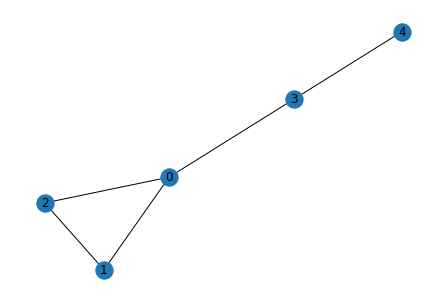

In [11]:
g1 = Graph(5)
g1.addEdge(1, 0)
g1.addEdge(0, 2)
g1.addEdge(2, 1)
g1.addEdge(0, 3)
g1.addEdge(3, 4)

cv1 = cutVertexCaluculate(g1)
cv1.cutVertex() 
ce1 = cutEdgeCalculate(g1)
ce1.cutEdge()
nx.draw(g1.nxg, with_labels=True)

[-1, 0, 1, 2]
[0, 1, 2, 3]
[False, 1, 1, False]

[-1, 0, 1, 2]
[0, 1, 2, 3]
[(2, 3), (1, 2), (0, 1)]



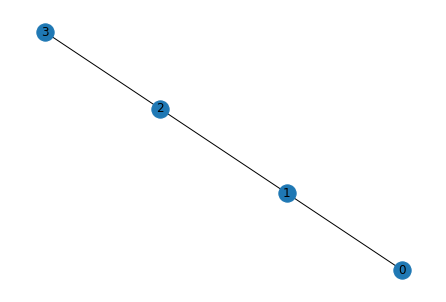

In [13]:
g2 = Graph(4)
g2.addEdge(0, 1)
g2.addEdge(1, 2)
g2.addEdge(2, 3)

cv2 = cutVertexCaluculate(g2)
cv2.cutVertex() 
ce2 = cutEdgeCalculate(g2)
ce2.cutEdge()
nx.draw(g2.nxg, with_labels=True)

[-1, 0, 1, 1, 5, 3, 1]
[0, 1, 2, 3, 5, 4, 6]
[False, 1, False, False, False, False, False]

[-1, 0, 1, 1, 5, 3, 1]
[0, 1, 2, 3, 5, 4, 6]
[(1, 6)]



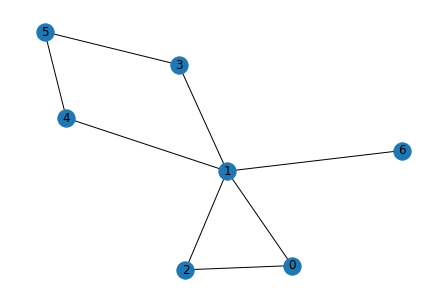

In [14]:
g3 = Graph (7)
g3.addEdge(0, 1)
g3.addEdge(1, 2)
g3.addEdge(2, 0)
g3.addEdge(1, 3)
g3.addEdge(1, 4)
g3.addEdge(1, 6)
g3.addEdge(3, 5)
g3.addEdge(4, 5)

cv3 = cutVertexCaluculate(g3)
cv3.cutVertex() 
ce3 = cutEdgeCalculate(g3)
ce3.cutEdge()
nx.draw(g3.nxg, with_labels=True)